# Image Classification using Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set=train_datagen.flow_from_directory(r"dataset\training_set",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r"dataset\test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2023 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
251/251 [==============================] - 74s 294ms/step - loss: 0.6742 - accuracy: 0.5848 - val_loss: 0.9050 - val_accuracy: 0.5264
Epoch 2/30
251/251 [==============================] - 75s 299ms/step - loss: 0.6179 - accuracy: 0.6682 - val_loss: 0.5749 - val_accuracy: 0.7079
Epoch 3/30
251/251 [==============================] - 75s 297ms/step - loss: 0.5716 - accuracy: 0.6998 - val_loss: 0.5576 - val_accuracy: 0.7232
Epoch 4/30
251/251 [==============================] - 75s 297ms/step - loss: 0.5353 - accuracy: 0.7325 - val_loss: 0.5271 - val_accuracy: 0.7489
Epoch 5/30
251/251 [==============================] - 75s 298ms/step - loss: 0.5071 - accuracy: 0.7475 - val_loss: 0.5154 - val_accuracy: 0.7489
Epoch 6/30
251/251 [==============================] - 75s 297ms/step - loss: 0.4935 - accuracy: 0.7610 - val_loss: 0.5276 - val_accuracy: 0.7444
Epoch 7/30
251/251 [==============================] - 77s 307ms/step - loss: 0.4717 - accuracy: 0.7718 - val_loss: 0.4777 - val_ac

In [14]:
cnn.evaluate(test_set)

64/64 [==============================] - 6s 97ms/step - loss: 0.5085 - accuracy: 0.8018


[0.5085302591323853, 0.8017795085906982]

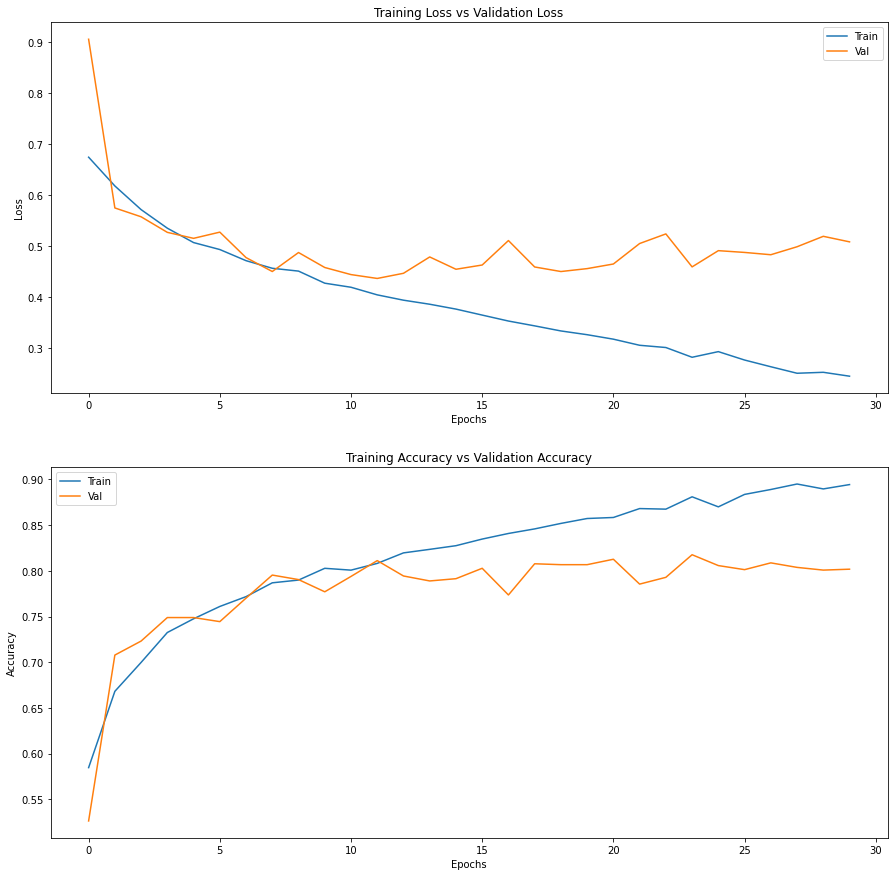

In [15]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

## Part 4 - Making a single prediction

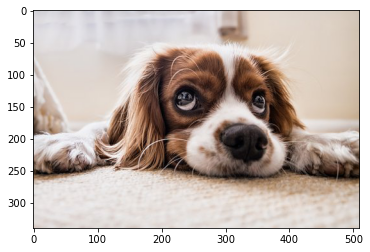

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
path=r"dataset\single_predection\cat_or_dog_0.jpg"
test_image = image.load_img(path)
plt.imshow(test_image)

In [18]:
test_image = image.load_img(path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

1/1 [==============================] - 0s 122ms/step


In [19]:
print(prediction)

dog
